# Exercise 1 - pandas repetition

## 0. Working with national test data

In [1]:
import pandas as pd

national_test_file_path = "data/riket2023_åk9_np.xlsx"

sheet_names = pd.ExcelFile(national_test_file_path).sheet_names

# iterate through sheet names
# read each sheet into a dictionary of dataframes
df_dict = {}

for sheet_name in sheet_names[:-1]:
    df_dict[sheet_name] = pd.read_excel(
        national_test_file_path, skiprows=8, sheet_name=sheet_name
    )

df_dict.keys()

dict_keys(['Engelska', 'Matematik', 'Svenska', 'Svenska som andraspråk'])

In [2]:
df_dict["Matematik"]

,Riket,Typ av huvudman,Totalt,Flickor,Pojkar,Totalt,Flickor,Pojkar,Totalt,Flickor,Pojkar
0,Riket,Samtliga,106766,51548,55218,89.1,88.7,89.5,11.9,11.8,12.0
1,Riket,Kommunal,84163,40386,43777,88.1,87.7,88.5,11.6,11.5,11.7
2,Riket,Enskild,22553,11137,11416,92.9,92.2,93.5,13.0,12.8,13.1
3,Riket,Skolverket,50,25,25,~100,~100,~100,14.1,13.5,14.7


In [3]:
subjects = list(df_dict.keys())
subjects

['Engelska', 'Matematik', 'Svenska', 'Svenska som andraspråk']

## b) change name of columns

In [4]:
df_dict["Engelska"].columns

Index(['Riket', 'Typ av huvudman', 'Totalt', 'Flickor', 'Pojkar', 'Totalt ',
       'Flickor ', 'Pojkar ', 'Totalt  ', 'Flickor  ', 'Pojkar  '],
      dtype='object')

In [5]:
import numpy as np
postfixes = [""]*2 + [" (A-F)"]*3 + [" (A-E)"]*3 + [" (poäng)"]*3

np.array(postfixes)

array(['', '', ' (A-F)', ' (A-F)', ' (A-F)', ' (A-E)', ' (A-E)', ' (A-E)',
       ' (poäng)', ' (poäng)', ' (poäng)'], dtype='<U8')

In [6]:
df_dict["Engelska"].columns + np.array(postfixes)

Index(['Riket', 'Typ av huvudman', 'Totalt (A-F)', 'Flickor (A-F)',
       'Pojkar (A-F)', 'Totalt  (A-E)', 'Flickor  (A-E)', 'Pojkar  (A-E)',
       'Totalt   (poäng)', 'Flickor   (poäng)', 'Pojkar   (poäng)'],
      dtype='object')

In [7]:
from copy import deepcopy

df_dict_cleaned = deepcopy(df_dict)

for subject in subjects:
    new_columns = df_dict_cleaned[subject].columns.str.strip() + np.array(postfixes)
    df_dict_cleaned[subject].columns = new_columns
    df_dict_cleaned[subject] = df_dict_cleaned[subject].rename(
        {"Riket": "Plats", "Typ av huvudman": "Huvudman"}, axis=1
    )

df_dict_cleaned["Matematik"]

,Plats,Huvudman,Totalt (A-F),Flickor (A-F),Pojkar (A-F),Totalt (A-E),Flickor (A-E),Pojkar (A-E),Totalt (poäng),Flickor (poäng),Pojkar (poäng)
0,Riket,Samtliga,106766,51548,55218,89.1,88.7,89.5,11.9,11.8,12.0
1,Riket,Kommunal,84163,40386,43777,88.1,87.7,88.5,11.6,11.5,11.7
2,Riket,Enskild,22553,11137,11416,92.9,92.2,93.5,13.0,12.8,13.1
3,Riket,Skolverket,50,25,25,~100,~100,~100,14.1,13.5,14.7


## c)

In [8]:
df_dict_cleaned["Matematik"].describe()

,Totalt (A-F),Flickor (A-F),Pojkar (A-F),Totalt (poäng),Flickor (poäng),Pojkar (poäng)
count,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000
mean,53383.000000,25774.000000,27609.00000,12.650000,12.400000,12.875000
std,50305.900509,24187.203159,26119.92477,1.138713,0.920145,1.357387
min,50.000000,25.000000,25.00000,11.600000,11.500000,11.700000
25%,16927.250000,8359.000000,8568.25000,11.825000,11.725000,11.925000
50%,53358.000000,25761.500000,27596.50000,12.450000,12.300000,12.550000
75%,89813.750000,43176.500000,46637.25000,13.275000,12.975000,13.500000
max,106766.000000,51548.000000,55218.00000,14.100000,13.500000,14.700000


In [9]:
df_dict_cleaned["Matematik"][["Huvudman","Totalt (poäng)"]]

,Huvudman,Totalt (poäng)
0,Samtliga,11.9
1,Kommunal,11.6
2,Enskild,13.0
3,Skolverket,14.1


## d)

In [10]:
# Totalt (A-F) - all students in a Huvudman
# Totalt (A-E) - all students that have passed in a Huvudman

# Pick Huvudman Samtliga

df_math = df_dict_cleaned["Matematik"]
df_math

,Plats,Huvudman,Totalt (A-F),Flickor (A-F),Pojkar (A-F),Totalt (A-E),Flickor (A-E),Pojkar (A-E),Totalt (poäng),Flickor (poäng),Pojkar (poäng)
0,Riket,Samtliga,106766,51548,55218,89.1,88.7,89.5,11.9,11.8,12.0
1,Riket,Kommunal,84163,40386,43777,88.1,87.7,88.5,11.6,11.5,11.7
2,Riket,Enskild,22553,11137,11416,92.9,92.2,93.5,13.0,12.8,13.1
3,Riket,Skolverket,50,25,25,~100,~100,~100,14.1,13.5,14.7


In [12]:
import duckdb

total_students = duckdb.query(
    """
    SELECT "Totalt (A-F)"
    FROM df_math
    WHERE huvudman = 'Samtliga'
"""
).df().values[0][0]

total_students

np.int64(106766)

In [13]:
students_passed = df_math.query("Huvudman == 'Samtliga'")["Totalt (A-E)"]*.01*total_students

students_passed

0    95128.506
Name: Totalt (A-E), dtype: object

In [15]:
students_failed = total_students - students_passed
students_failed[0]

11637.493999999992

## e) bar chart on total points for each subject

In [18]:
total_points = {}
# {
# Engelska : ..., Matematik: ..., Svenska: ...
# }

# matplotlib bar plot, x = keys, height = points

df_dict_cleaned["Engelska"].query("Huvudman == 'Samtliga'")["Totalt (poäng)"][0]


np.float64(15.7)

In [20]:
for subject in subjects:
    total_points[subject] = df_dict_cleaned[subject].query("Huvudman == 'Samtliga'")["Totalt (poäng)"][0]

total_points

{'Engelska': np.float64(15.7),
 'Matematik': np.float64(11.9),
 'Svenska': np.float64(13.6),
 'Svenska som andraspråk': 9.4}

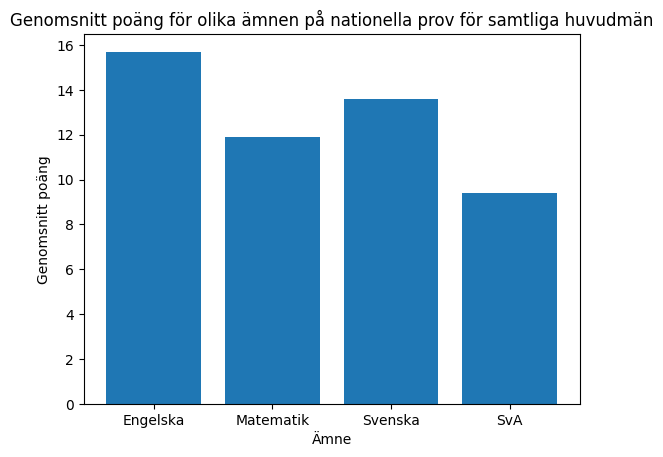

In [26]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(1)

ax.bar(x = total_points.keys(), height=total_points.values())
ax.set(xlabel="Ämne", ylabel="Genomsnitt poäng", title="Genomsnitt poäng för olika ämnen på nationella prov för samtliga huvudmän",)

subjects[-1] = "SvA"
ax.set_xticks(labels=subjects, ticks=range(len(subjects)));